In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Warm-up (4 points)

## 1.1 Creating Matrices (0.25 points)

Create 4 matrices
- A - a "checkerboard" matrix of zeros and ones, size 6x3, with the top-left value (A[0][0]) equal to 1,
- В - a matrix of numbers from 1 to 24, arranged in a snake-like pattern, size 6x4,
- C - a matrix of random integers from 2 to 10 (inclusive), size 4x3,
- D - a matrix of zeros with ones on the main diagonal, size 4x4.

**Create a “patchwork” matrix S from these matrices**

A В

С D

using **only standard** numpy operations. Do not use Comprehensions.

Then, append matrix **F** of size 10x2 filled with zeros to the resulting matrix **S** to create matrix **G**:

S F

Note: When we say a matrix has a size of x by y, x is the number of rows, and y is the number of columns.

In [ ]:

# Step 1: Create matrix A (6x3 checkerboard)
A = np.tile([[1, 0, 1], [0, 1, 0]], (3, 1))

# Step 2: Create matrix B (6x4 snake-like)
B = np.zeros((6, 4), dtype=int)
for i in range(6):
    B[i] = np.arange(i * 4 + 1, (i + 1) * 4 + 1)[::(-1) ** i]  # Create snake pattern

# Step 3: Create matrix C (4x3 random integers from 2 to 10)
C = np.random.randint(2, 11, (4, 3))

# Step 4: Create matrix D (4x4 identity)
D = np.eye(4, dtype=int)

# Step 5: Combine matrices to form the patchwork matrix S
top = np.hstack((A, B))  # Top part: A | B
bottom = np.hstack((C, D))  # Bottom part: C | D
S = np.vstack((top, bottom))  # Combine top and bottom

# Step 6: Create matrix F (10x2 zeros)
F = np.zeros((10, 2), dtype=int)

# Step 7: Append F to S to form matrix G
G = np.hstack((S, np.vstack((F, np.zeros((S.shape[0] - F.shape[0], 2), dtype=int)))))

# Display matrices using pandas for better visualization
print("Matrix A:")
print(pd.DataFrame(A))

print("\nMatrix B:")
print(pd.DataFrame(B))

print("\nMatrix C:")
print(pd.DataFrame(C))

print("\nMatrix D:")
print(pd.DataFrame(D))

print("\nMatrix F:")
print(pd.DataFrame(F))

print("\nPatchwork Matrix S:")
print(pd.DataFrame(S))

print("\nFinal Matrix G:")
print(pd.DataFrame(G))


## 1.2 Finding the Nearest Neighbor (0.25 points)

Implement a function that takes a matrix **X** and a number **a** and returns the element in the matrix closest to the given number.
   
For example, for **X = np.arange(0, 10).reshape((2, 5))** and **a = 3.6**, the answer will be 4. You can only use basic numpy functions, **do not use loops**.

In [41]:
def find_nearest_neighbour(X,a):
    diff = np.abs(X - a).argmin()
    return X.flat[diff]

X = np.arange(0, 10).reshape((2, 5))
a = 2.3

result = find_nearest_neighbour(X,a)

print(result)

2


## 1.3 Very Strange Neural Network (0.25 points)

Implement a strange neural network. The network should:

- Square matrix **A** (the weight matrix) of size N x N.
- In the first transformation, multiply a vector **X** of length N (feature vector) by the weight matrix **A^2** (the output will be a new vector).
- In the second transformation, multiply the resulting vector by vector **b** (weight vector) of size N to produce a scalar value.

Assume that all elements in matrices and vectors are floating-point numbers.

In [ ]:
# Create your own data for an example, with N >= 4
A = np.random.rand(2,2)
b = np.random.rand(1,2)
X = np.random.rand(2,1)

def very_strange_neural_network(A, b, X):
    A_squared = np.dot(A, A)
    
    intermediate_vector = np.dot(A_squared, X)
    
    result = np.dot(b, intermediate_vector)
    return result

print(very_strange_neural_network(A,b,X))

[[0.96489273]]


## 1.4 The Jungle Calls! (0.25 points)

You are given a matrix **M**, a map of an impassable jungle terrain created by Lara Croft. Each cell in the map is an integer representing the height above sea level (if positive) in meters or the sea depth (if negative) in meters in a one-meter-by-one-meter area of the map. If the number is 0, it represents land - a shoreline.

You need to calculate:
- The total area of cells in the sea where the depth is greater than 5 (in m^2).
- The total volume of water on the map (in m^3).
- The maximum height above sea level on this map (in m).

In [84]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return -np.sum(M[M < 0])

def find_max_height(M):
    return np.amax(M)

In [87]:
M = np.array([
    [-7, -8, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# simple check for the example above
assert np.isclose(find_deep_sea_area(M), 2)
assert np.isclose(find_water_volume(M), 26)
assert np.isclose(find_max_height(M), 25)

print("Total sea area on the map -", find_deep_sea_area(M), "м^2")
print("Total water volume on the map -", find_water_volume(M), "м^3")
print("Maximum elevation on the map -", find_max_height(M), "м")


Total sea area on the map - 2 м^2
Total water volume on the map - 26 м^3
Maximum elevation on the map - 25 м


## 1.5 Treasure Islands (0.25 points)


The function takes an array **a** of zeros and ones as input. Count the number of consecutive blocks of ones (islands) in the array. Only basic numpy functions are allowed, **no loops**.

Hint: check what `np.diff` does.

In [28]:
def count_all_islands(a):
    transitions = np.diff(a)  # Differences between consecutive elements
    return np.sum(transitions == 1) + (a[0] == 1)

In [80]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))


4


## 1.6 Masquerade (0.25 points)

The input is a 2D matrix **X** filled with floating-point numbers and a floating-point number **a**. Replace all cells in the matrix greater than **a** with the average value of the elements in **X**.

**You must** use basic numpy functions, **no loops**.

In [71]:
def swap_mask_for_average(X, a):
    avg = np.average(X)
    M[M > a] = avg
    return M

In [79]:
# You can create your own example.
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5
print(np.average(M))
# simple check for the example above
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))
swap_mask_for_average(M, a)

2.875


array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 Hot on the Trails (0.25 points)

The input is a square matrix **M**. Calculate the difference between the sum along the main diagonal and the secondary diagonal.

Only basic numpy functions are allowed, **no loops**.

Hint: look up `np.trace`.

In [101]:
import numpy as np
np.trace(np.eye(3))
a = np.random.randint(4,11,(2,2))
print(a)
np.trace(a)

[[9 7]
 [6 7]]


np.int64(16)

In [ ]:
def count_trace_diff(M):
    mdiag = np.trace(M)
    sediag = np.trace(np.fliplr(M))
    return mdiag - sediag

In [109]:
# You can create your own example.
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
# simple check for the example above
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

np.int64(3)

## 1.8 King of the Hill (0.25 points)

The input is a vector a of size N. Using addition, concatenation, and broadcasting, create a symmetric matrix of size 2N x 2N with the maximum value in the center and decreasing values toward the edges.

Example: a = (0, 1, 2)

Result:

0 1 2 2 1 0 <br /> 
1 2 3 3 2 1 <br /> 
2 3 4 4 3 2 <br /> 
2 3 4 4 3 2 <br /> 
1 2 3 3 2 1 <br /> 
0 1 2 2 1 0 <br /> 

In [155]:
def create_mountain(a):
    base = a[:, None] + a
    top_half = np.concatenate([base, base[:, ::-1]], axis=1)
    full_matrix = np.concatenate([top_half, top_half[::-1, :]], axis=0)
    return full_matrix

In [156]:
# You can create your own example.
a = np.array([0, 1, 2, 3,4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Monochrome Photograph 9x12 (0.5 points)

The input is a 2D matrix **P** of size N x M filled with numbers from 0 to 255, representing a grayscale photograph, and a natural number **C**. You need to produce a matrix of size (N - C + 1) x (M - C + 1), where each cell is the average value of the corresponding sub-matrix of size **C x C**. Essentially, this will apply a simple blur effect (slightly reducing its size).

In [68]:
def custom_blur(P, C):
    # Shape of the output matrix
    N, M = P.shape
    output_shape = (N - C + 1, M - C + 1)
    
    # Stride-based sub-matrices using broadcasting to calculate averages
    sub_matrices = np.lib.stride_tricks.sliding_window_view(P, (C, C))
    return sub_matrices.mean(axis=(-2, -1))  # Average over each CxC sub-matrix



In [69]:
# Example matrix and kernel
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# Applying the blur function
result = custom_blur(P, kernel)

# Printing the result
print(result)

# Simple check for validation
assert np.allclose(result, np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))

[[2.5 3.5 4.5]
 [6.5 7.5 8.5]]


## 1.10 Validation Function (0.75 points)

The input to the function is an arbitrary number (>2) of tuples representing the shapes of different matrices. The function should return True if the matrices can be sequentially added together (possibly using broadcasting), and False otherwise.

In [71]:
def check_successful_broadcast(*matrices):
    # Helper function to check broadcasting compatibility between two shapes
    def are_shapes_compatible(shape1, shape2):
        # Reverse the shapes to align trailing dimensions
        shape1, shape2 = shape1[::-1], shape2[::-1]
        for i in range(max(len(shape1), len(shape2))):
            dim1 = shape1[i] if i < len(shape1) else 1
            dim2 = shape2[i] if i < len(shape2) else 1
            if dim1 != dim2 and dim1 != 1 and dim2 != 1:
                return False
        return True

    # Sequentially check compatibility
    current_shape = matrices[0]
    for next_shape in matrices[1:]:
        if not are_shapes_compatible(current_shape, next_shape):
            return False
        # Update the current shape to the resulting broadcasted shape
        current_shape = tuple(
            max(dim1, dim2) if dim1 != 1 and dim2 != 1 else max(dim1, dim2)
            for dim1, dim2 in zip(
                (1,) * (len(next_shape) - len(current_shape)) + current_shape,
                (1,) * (len(current_shape) - len(next_shape)) + next_shape
            )
        )
    return True

In [72]:
# I test with my examples
print(check_successful_broadcast((5, 6, 7), (6, 7), (1, 7)))
print(check_successful_broadcast((2,5,8),(2,1,1)))


True
True


## 1.11 Pairwise Distances (0.75 points)

The input is matrices A of size m x k and B of size n x k. Create a matrix of size m x n containing pairwise Euclidean distances.

Only use basic functions, do not use loops or third-party libraries. Broadcasting will probably be useful. The solution must be **in one line**, following all code style rules.

In [169]:
def pairwise_distances(A, B):
    return ((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=2) ** 0.5


In [170]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8], [9, 10]])

pairwise_distances(A, B)

array([[ 5.65685425,  8.48528137, 11.3137085 ],
       [ 2.82842712,  5.65685425,  8.48528137]])

Explain the logic behind this one-liner. What exactly is happening?

<font color='pink'> MY ANSWER </font>

**1. Matrix Shapes:**

- A is m×k, where m is the number of rows (points) and k is the dimensionality of each point.
- B is n×k, where n is the number of rows (points) and k is the dimensionality of each point.

**2. Broadcasting for Pairwise Differences:**

- A[:, None, :] :
    + Expands A to shape m×1×k.
    + Each row of A is now paired with every row of B in a new dimension.
- B[None, :, :] :
    + Expands B to shape 1×n×k.
- Subtracting these expanded matrices:
    + Produces a new matrix of shape m×n×k, where each element at (i, j, :) represents the element-wise difference between roe i of A and row j of B.

**3. Square the Differences:**

- A[:, None, :] - B[None, :, :] :
    + Computes the square of each element-pairwise difference, preserving the m×n×k shape.

**4. Summing Along Dimensions:**

- sum(axis=2) :
    + Sums the squared differences along the last axis (k), producing a m×n matrix where each element (i,j) is the squared Euclidean distance between the i-th row ofA and the j-th row of B.

**5. Square Root for Euclidean Distance**

- ** 0.5 :
    + Takes the square root of each element in the m×n matrix, converting squared distances to Euclidean distances.

# 2. Data Experiment Processing (3 points)

Ladies and gentlemen, now we're going to learn to use libraries for data analysis in real-life scenarios!

**The reason behind this section is simple**: many students in the Faculty of Physics and Mathematics still rely on Excel, calculators, or pen and paper even in their second or third semesters. Our goal is to introduce another method for conducting laboratory work with a much lower entry barrier than Excel itself. We hope this motivates some to explore these handy libraries further.

*Data sponsor for this section - blacksamorez. Without them, five happy semesters of labs would have been far less joyful...*

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

##  2.1. Problem Statement and Data

Let's assume we have a gyroscope with a weight attached to its axis on an arm (see the diagram for a quick understanding, and you can find more details in the [laboratory manual](https://lib.mipt.ru/book/267519/), volume 1, p.160). Due to the weight, the gyroscope begins to slowly [precess](https://en.wikipedia.org/wiki/Precession), i.e., it rotates around the vertical axis with a relatively constant frequency.

We'll work through part of this lab, primarily focusing on data processing and plotting graphs.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Diagram of the gyroscope with the attached weight G and arm C</center>

In [242]:
data = pd.read_csv('data_numpy_lab.csv')
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Working with Data

The columns in the dataframe are as follows:

- N: Number of full gyroscope rotations in the experiment;
- t, in seconds: Time of the experiment;
- σ_t: Measurement error in time;
- mass: Mass of the weight attached to the arm on the gyroscope;
- length: Length of the previously mentioned arm;
- phi: Angle in radians by which the arm dropped during the experiment. This will help us estimate the effect of friction in the gyroscope on precession.

Since physicists like to work with properly dimensioned quantities, convert the mass columns to kilograms and length to meters. Then rename all columns to exclude references to units—use only the names of physical quantities.

In [243]:
data['mass, gramm']= data['mass, gramm'] / 1000
data['length, cm'] = data['length, cm'] /100



In [244]:
data.rename(columns={"t, sec" : 't', 'sigma_t, sec' : 'sigma_t', 'mass, gramm' : 'mass',
       'length, cm' : 'length', 'phi, rad' : 'phi'}, inplace=True)
data.head()

,Unnamed: 0,N,t,sigma_t,mass,length,phi
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


In [245]:
assert data.mass.mean() < 0.3
assert np.allclose(data['length'].mean(), 1.155)
# assert all(' ' not in column for column in data.columns)


Add new columns to the dataframe with the corresponding names and values, calculated using these formulas:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$

In [259]:
data['omega'] = (2*np.pi * data['N']) / data['t']
data['sigma_omega'] = (data['omega'] / data['t']) * data['sigma_t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_down'] = data['omega_down'] * (data['sigma_t']/data['t'])
data['momentum'] = data['mass'] * data['length'] * 9.8
data['momentum_down'] = data['mass'] * (data['phi']/(data['t']**2)) * (data['length'] ** 2)
data['sigma_momentum'] = data['momentum_down'] * 2 * (data['sigma_t'] / data['t'])

# assert np.allclose(data.momentum_down[1], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
# assert np.allclose(data.sigma_momentum[0:5], 2.2e-09, atol=5e-10)

data.head()

,Unnamed: 0,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


You may have already wondered why the experiments with the same mass are repeated so many times. To achieve more stable results, of course! Now calculate the average values of the columns `omega`, `σ_omega`, `momentum`, and `momentum_down` for each unique mass.


**Hint:** The groupby function will help you here. No loops allowed!

In [336]:
# YOUR CODE HERE

grouped_data = data.groupby('mass')[['omega', 'sigma_omega' , 'momentum', 'momentum_down']].mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

print(grouped_data)

          omega  sigma_omega  momentum  momentum_down
mass                                                 
0.142  0.066661     0.000236  1.683836   4.108862e-07
0.180  0.094012     0.000352  2.134440   6.202853e-07
0.216  0.081687     0.000354  2.286144   7.755223e-07
0.273  0.143300     0.000817  3.263988   2.166527e-06
0.341  0.150752     0.000723  3.675980   1.577406e-06
0.614  0.185194     0.000910  6.679092   3.030996e-06


## 2.3 Simple Graphs and Least Squares Method (LSM)

It's now time to reintroduce the Least Squares Method (LSM). Of course, we won't make you write LSM yourself! <s>We're not that cruel</s>

In NumPy, the function [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) calculates a polynomial of a given degree that best fits `y(x)` using LSM for the provided `x`, `y`, and degree `p`.

The function [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html) evaluates the polynomial `P(x)` with given coefficients.

Your task is to plot the dependence $\Omega (M)$ (angular velocity on moment of inertia). The graph should include experimental points and a line fitted using the least squares method. In the legend, include the polynomial with the calculated coefficients. Don't forget to label the axes (font size 14), add a grid, and provide a suitable title (font size 18)!

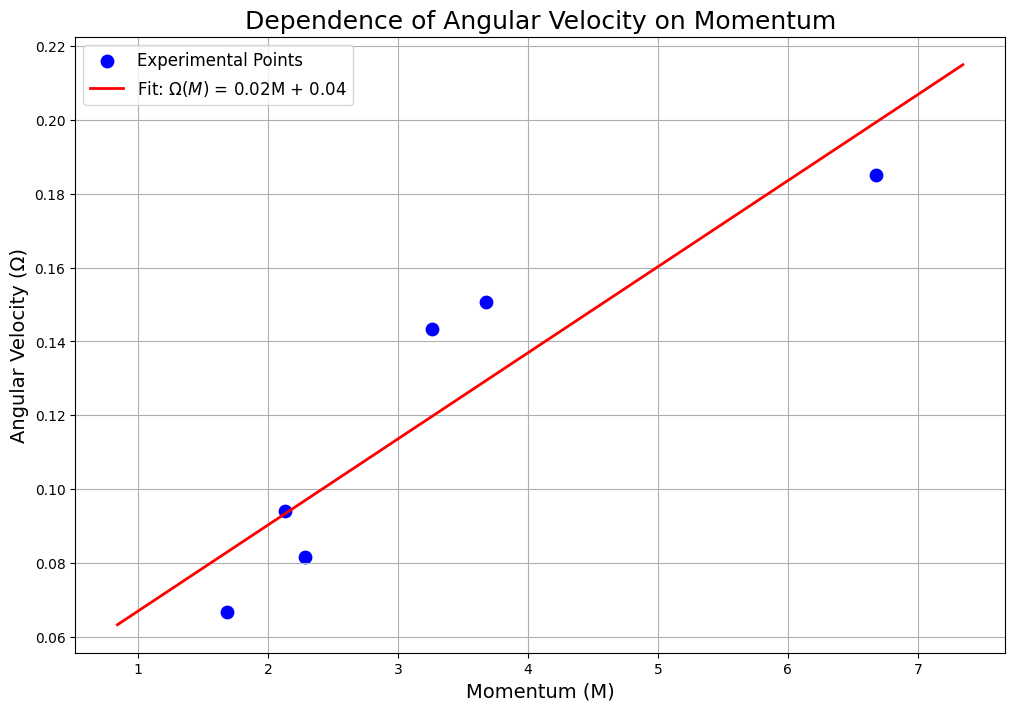

In [337]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# Take advantage of np.polyfit
coefs = np.polyfit(momentum_np, omega_np, 1)

# To make the line extend smoothly beyond the points
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

# Apply np.polyval to the coefficients and x_lsq
y_lsq = np.polyval(coefs, x_lsq)


fig = plt.figure(figsize=(12, 8))

plt.scatter(momentum_np, omega_np, color='blue', label='Experimental Points', s=80)
plt.plot(x_lsq, y_lsq, color='red', label=f'Fit: $\\Omega(M)$ = {coefs[0]:.2f}M + {coefs[1]:.2f}', linewidth=2)

# Add labels, title, legend, and grid
plt.xlabel('Momentum (M)', fontsize=14)
plt.ylabel('Angular Velocity (Ω)', fontsize=14)
plt.title('Dependence of Angular Velocity on Momentum', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

`np.polyfit` also estimates errors! Specifically, it returns the covariance matrix for the least squares method. Without delving into the math, all you need to know is that the diagonal elements are the variances of the calculated coefficients. To get the actual error $\sigma$, take the square root of these variances.

Also, note the `W` parameter, which sets point weights for the estimate. If $y_{error}$ values are known, you can set weights as $W = 1 / y_{error}$ to get an even more precise line. To account for $x$ errors as well, you'd need other methods (but $y$ errors alone are likely sufficient).

Suppose there's been a mishap, and the errors have increased tenfold!

In [338]:
grouped_data = data.groupby('mass')[['omega', 'omega_down', 'sigma_omega' , 'momentum', 'momentum_down', 'sigma_down', 'sigma_momentum']].mean()

Now, you need to plot the dependence $\Omega_{down} (M_{down})$ <b>(not $\Omega(M)$!)</b> for points with error bars. In addition to plotting the line from the least squares estimate, include the error estimates for the coefficients. So, plot three lines: $k \cdot x + b$ from the LSM, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, and $(k + \sigma_k) \cdot x + (b + \sigma_b)$, filling the area between these lines with shading (use `plt.fill_between` for this). Keep the rest of the styling as in the previous task.

_Note: Often in LSM, only the error for `k` is considered, leaving out `σ_b`._

In [339]:
grouped_data['sigma_down'] = grouped_data['sigma_down'] * 10
grouped_data['sigma_momentum'] = grouped_data['sigma_momentum'] * 10

/var/folders/t5/jz1k7wm91wg21d8k4tm8nzp80000gn/T/ipykernel_19321/2626710084.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(momentum_down_np, omega_down_np,


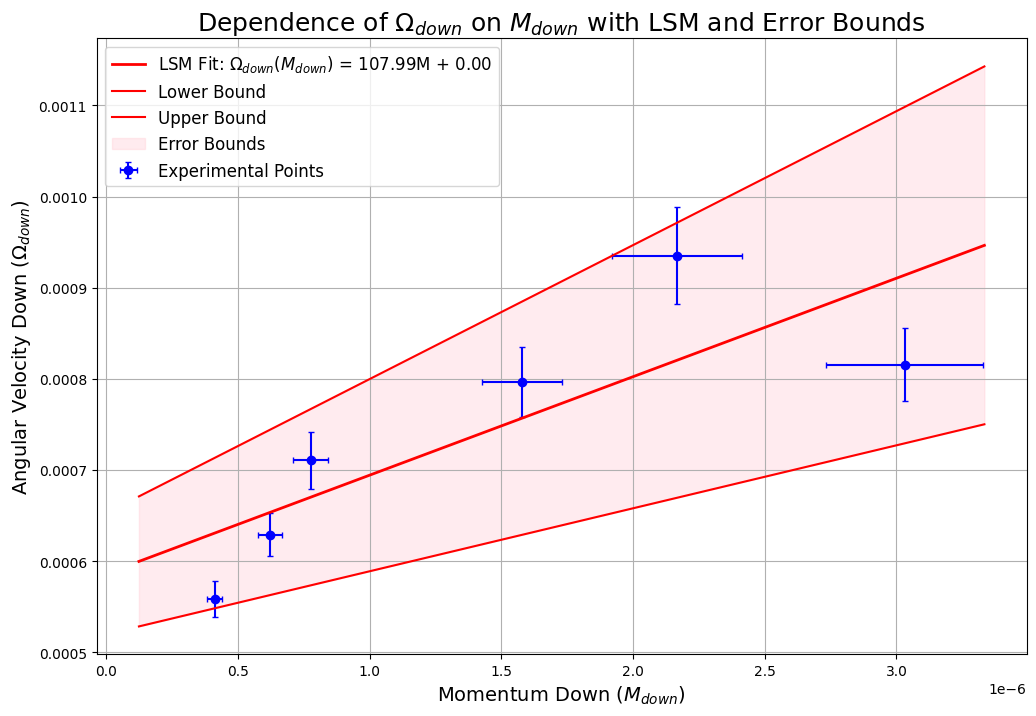

In [340]:
omega_down_np = np.array(grouped_data['omega_down'])
momentum_down_np = np.array(grouped_data['momentum_down'])

# Perform least squares fit with covariance
coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

#Calculate the square root of the diagonal elements
lsq_stds = np.sqrt(np.diag(cov))  # [σ_k, σ_b]

# Generate x values for the fitted line
x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

# Compute the lines
y_lsq = np.polyval(coefs, x_lsq)  # Best fit
y_lsq_lower = np.polyval([coefs[0] - lsq_stds[0], coefs[1] - lsq_stds[1]], x_lsq)  # Lower bound
y_lsq_upper = np.polyval([coefs[0] + lsq_stds[0], coefs[1] + lsq_stds[1]], x_lsq)  # Upper bound

# Plot the results
fig = plt.figure(figsize=(12, 8))

# Plot data points with error bars
plt.errorbar(momentum_down_np, omega_down_np, 
             xerr=grouped_data['sigma_momentum'], yerr=grouped_data['sigma_down'], 
             fmt='ro', color='blue', label='Experimental Points', capsize=2)

# Plot the least squares line
plt.plot(x_lsq, y_lsq, color='red', label=f'LSM Fit: $\\Omega_{{down}}(M_{{down}})$ = {coefs[0]:.2f}M + {coefs[1]:.2f}', linewidth=2)

# Plot the lower and upper bounds
plt.plot(x_lsq, y_lsq_lower, '-', color='red', label='Lower Bound', linewidth=1.5)
plt.plot(x_lsq, y_lsq_upper, '-', color='red', label='Upper Bound', linewidth=1.5)

# Fill the area between the bounds
plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='pink', alpha=0.3, label='Error Bounds')

# Add labels, title, legend, and grid
plt.xlabel('Momentum Down ($M_{down}$)', fontsize=14)
plt.ylabel('Angular Velocity Down ($\\Omega_{down}$)', fontsize=14)
plt.title('Dependence of $\\Omega_{down}$ on $M_{down}$ with LSM and Error Bounds', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# 3. Working with the Dataset (3 points)

The Iris dataset was used in R.A. Fisher's 1936 paper “The Use of Multiple Measurements in Taxonomic Problems” and is now commonly used by beginner data analysts.

The dataset includes three species of iris flowers, with 50 samples for each species, along with several properties of each flower. One species is linearly separable from the other two, but the latter two are not linearly separable from each other.

The columns in this dataset:

Identifier (Id) \
Sepal length in cm (SepalLengthCm)\
Sepal width in cm (SepalWidthCm) <br /> 
Petal length in cm (PetalLengthCm) <br /> 
Petal width in cm (PetalWidthCm) <br /> 
Species (Species)

<font color='red'>Attention!</font> All plots in this part should be labeled!

In [3]:
sns.set_style("darkgrid")

In [4]:
# Read the CSV file into a pandas DataFrame using pd.read_csv
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Create the Id column for iris data frame:
iris['Id'] = range(1, len(iris) + 1)
iris = iris[['Id','sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']]
iris.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
# The Id column isn’t very useful,
# so let’s remove it- HINT: use the `drop` method.
iris = iris.drop('Id', axis=1)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's check how many different iris species we have—there should be three, with 50 samples each. Use `value_counts` to see the possible values in the species column.

In [390]:
iris.value_counts('type')

type
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

## 3.1 Petal Length and Width Plots

Let's examine whether petal width and length are related—use `sns.scatterplot` to display the OXY values. Remember to label the plot and the axes!

In [421]:
iris_sb = iris[['petal_length', 'petal_width', 'species']]

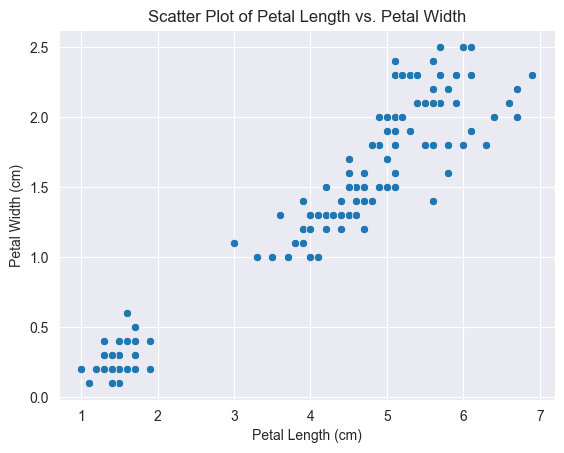

In [7]:

sns.scatterplot(data= iris,x = 'petal_length', y = 'petal_width')

plt.title("Scatter Plot of Petal Length vs. Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


What conclusions can you draw from the scatter plot? What is missing from the plot to make it more informative?

<font color='pink'>MY ANSWER:</font>

The scatter plot shows a strong positive correlation between petal length and petal width. As petal length increases, petal width also increases. However, the plot lacks additional information that could make it more informative, such as distinguishing points by species.

Let's try other plot types for the same purpose from the seaborn library—`sns.jointplot`, and also try to color the points based on iris species using `sns.facetgrid`. Display these two plots in the following cells and analyze them.

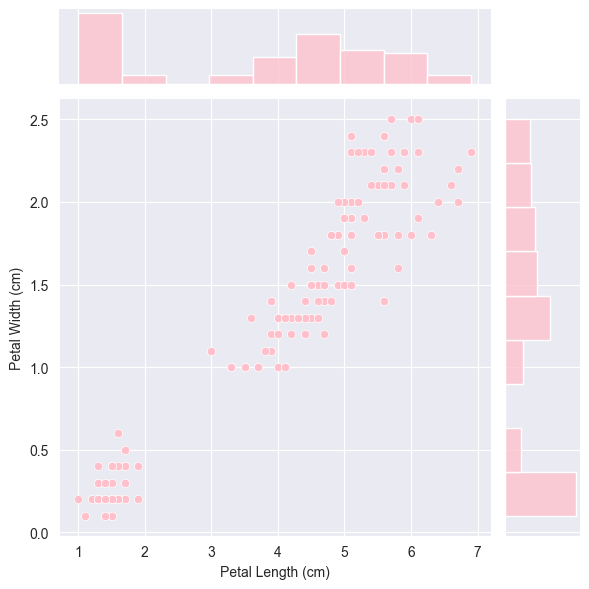

In [ ]:
sns.jointplot(data= iris,x = 'petal_length', y = 'petal_width', color='pink')


plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

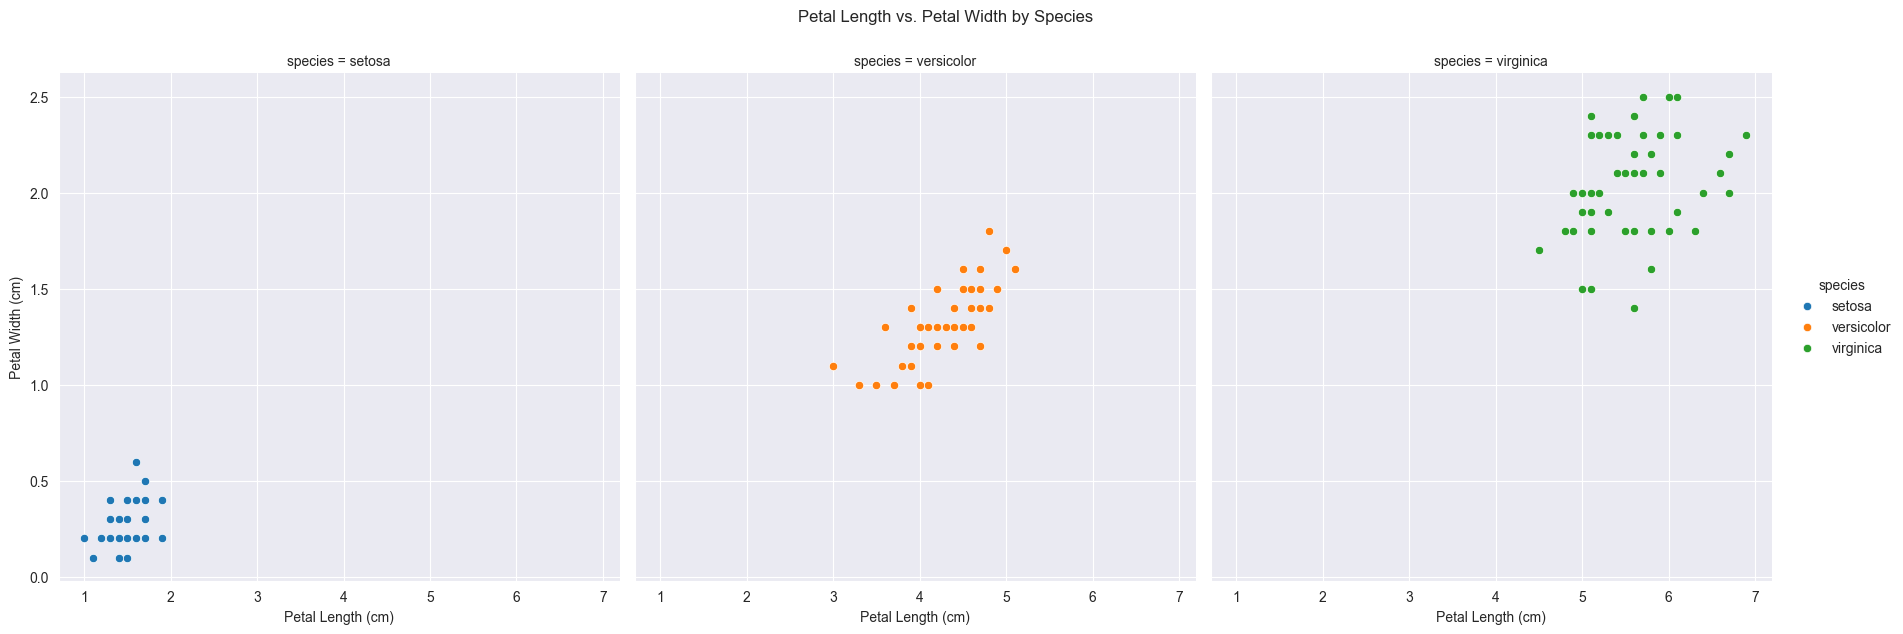

In [49]:
facet = sns.FacetGrid(iris, col="species", hue="species", height=6)
facet.map_dataframe(sns.scatterplot, "petal_length", "petal_width").add_legend()

# # Add labels and title
facet.set_axis_labels("Petal Length (cm)", "Petal Width (cm)")
plt.suptitle("Petal Length vs. Petal Width by Species", y=1.05)
plt.show()

Or we can color the point like this:

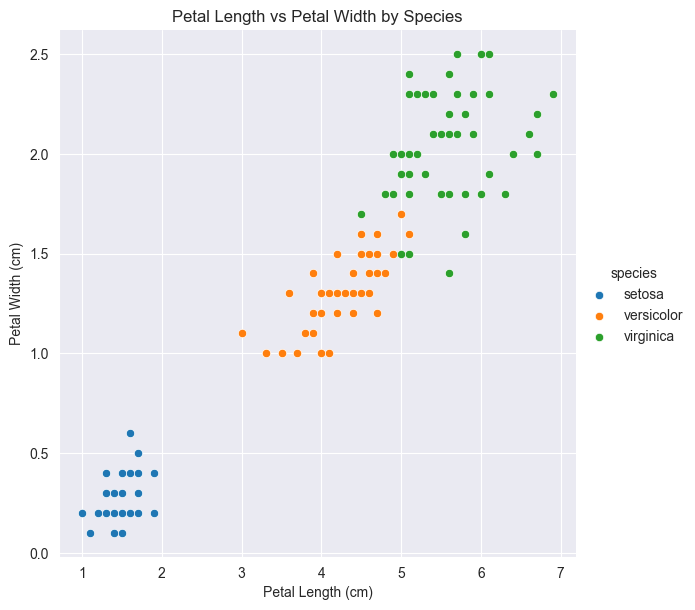

In [34]:
facet = sns.FacetGrid(iris, hue="species", height=6)
facet.map_dataframe(sns.scatterplot, "petal_length", "petal_width").add_legend()

# # Add labels and title
facet.set_axis_labels("Petal Length (cm)", "Petal Width (cm)")
plt.title("Petal Length vs Petal Width by Species")
plt.show()

What conclusions can you draw from these plots? Which of the three methods — scatterplot, jointplot, or facetgrid seems the best to you?

<font color='pink'> MY ANSWER: </font>
- 1. Jointplot:
 + Combines the scatter plot with marginal histograms, providing insights into both the relationship and the distribution of petal_length and petal_width.
 + Highlights clusters in the data and shows how densely the points are distributed across different ranges. From that we can see the common value or the range of data frame, and see the trend of relationship between petal_length and petal_width.

- 2. FaceGrid:
 + Setosa is distinctly separate with smaller petal measurements.
 + Versicolor and Virginica overlap slightly but show distinct trends. Virginica has the bigger measurement than the others

For me, FacetGrid as it provides the clearest insight into how the variables relate within and across species. Easy to analyze.

## 3.2 Distribution Plots of Petal Length Values

Plot a “box-and-whisker plot” with `sns.boxplot` and its counterpart with `sns.violinplot`. The x-axis should represent the iris species, and the y-axis should represent petal length.

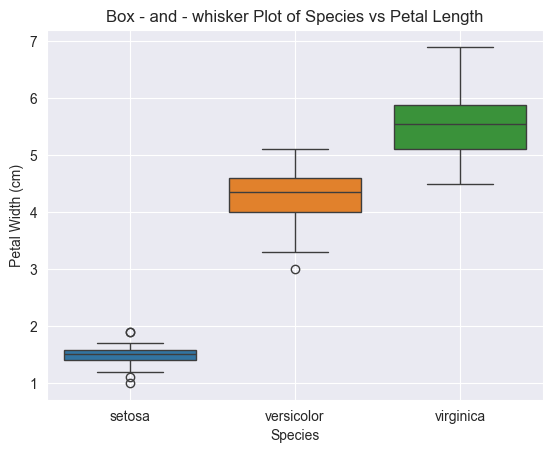

In [40]:
sns.boxplot(data=iris, x="species", y="petal_length", hue='species')

plt.title("Box - and - whisker Plot of Species vs Petal Length")
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.show()

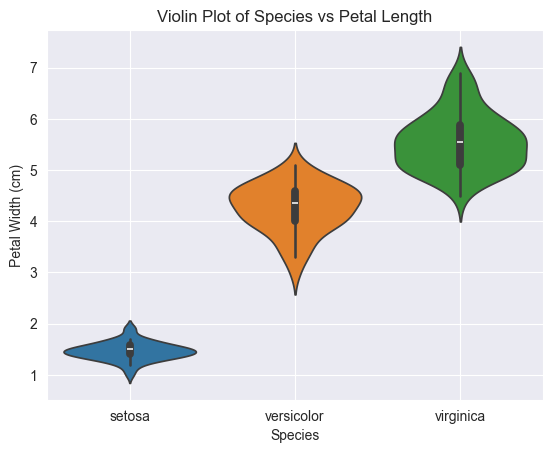

In [41]:
sns.violinplot(data=iris, x="species", y="petal_length", hue='species')

plt.title("Violin Plot of Species vs Petal Length")
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.grid(True)
plt.show()

Compare the two types of plots. Which one is more informative, and which is more visually appealing in your opinion? What information can we gather from these plots?

<font color='pink'> MY ANSWER </font>


***Comparison***

**1. Box-and-Whisker Plot**

**What it shows:**

+ Median:
+ The central line in the box represents the median (50th percentile).
+ Interquartile Range (IQR): The box itself spans the range between the 25th percentile (Q1) and 75th percentile (Q3).
+ Whiskers: These extend to the smallest and largest values within 1.5 × IQR.
+ Outliers: Individual points outside the whisker range are displayed as dots.

**2. Violin Plot**

**What it shows:**

+ Combines the features of a box plot with a kernel density estimate (KDE).
+ Density: The width of the violin indicates how densely values are distributed at each level.
+ Central Tendencies: Often includes a mini box plot inside the violin to indicate the median and quartiles.

**Comparison in the Context of Iris Dataset:**

1. Box-and-Whisker Plot:

Insight: Shows the clear separation of the species based on petal length.
Setosa has distinctly smaller petal lengths compared to the other two species.
Versicolor and Virginica overlap slightly, but the medians and IQRs are different, hinting at distinguishable differences.

2. Violin Plot:
Insight: Adds information about the density of petal length distributions within each species.
Reveals that Setosa petal lengths are tightly clustered, showing a single peak.
Highlights possible bimodality or spread in Versicolor and Virginica, which are not as clear in the box plot.

***Which is More Informative?***

- Violin Plot is more informative because it provides a richer representation of the data distribution along with central tendencies.

***Which is More Visually Appealing?***

- The Box-and-Whisker Plot is clean and simple, appealing for straightforward statistical comparisons.
- The Violin Plot, however, is visually richer and may appeal more when exploring or presenting the data interactively.

***Information gathered:***

**Distinctiveness of Setosa:**

Petal lengths for Setosa are entirely non-overlapping with Versicolor and Virginica. This makes Setosa very easy to classify based on petal length alone.

**Overlap between Versicolor and Virginica:**

There is significant overlap between these two species, particularly at the boundary of their petal length ranges. While their medians differ, this overlap complicates classification and indicates that petal length alone may not always reliably separate these two species.

**Variability:**

Setosa has minimal variability in petal length, while Virginica and Versicolor have broader and overlapping distributions, suggesting greater diversity within these species.

**Distribution Shape:**

The violin plots reveal that Setosa has a narrow distribution, while Versicolor and Virginica exhibit wider and more even distributions. This reflects differences in the consistency of petal lengths within species.


## 3.3 Pairwise Feature Comparison Plots


Let's create a 4x4 grid of plots where all possible pairs of features (petal length/width, sepal length/width) are displayed. Use `sns.pairplot`, and don't forget to specify the `hue` parameter.

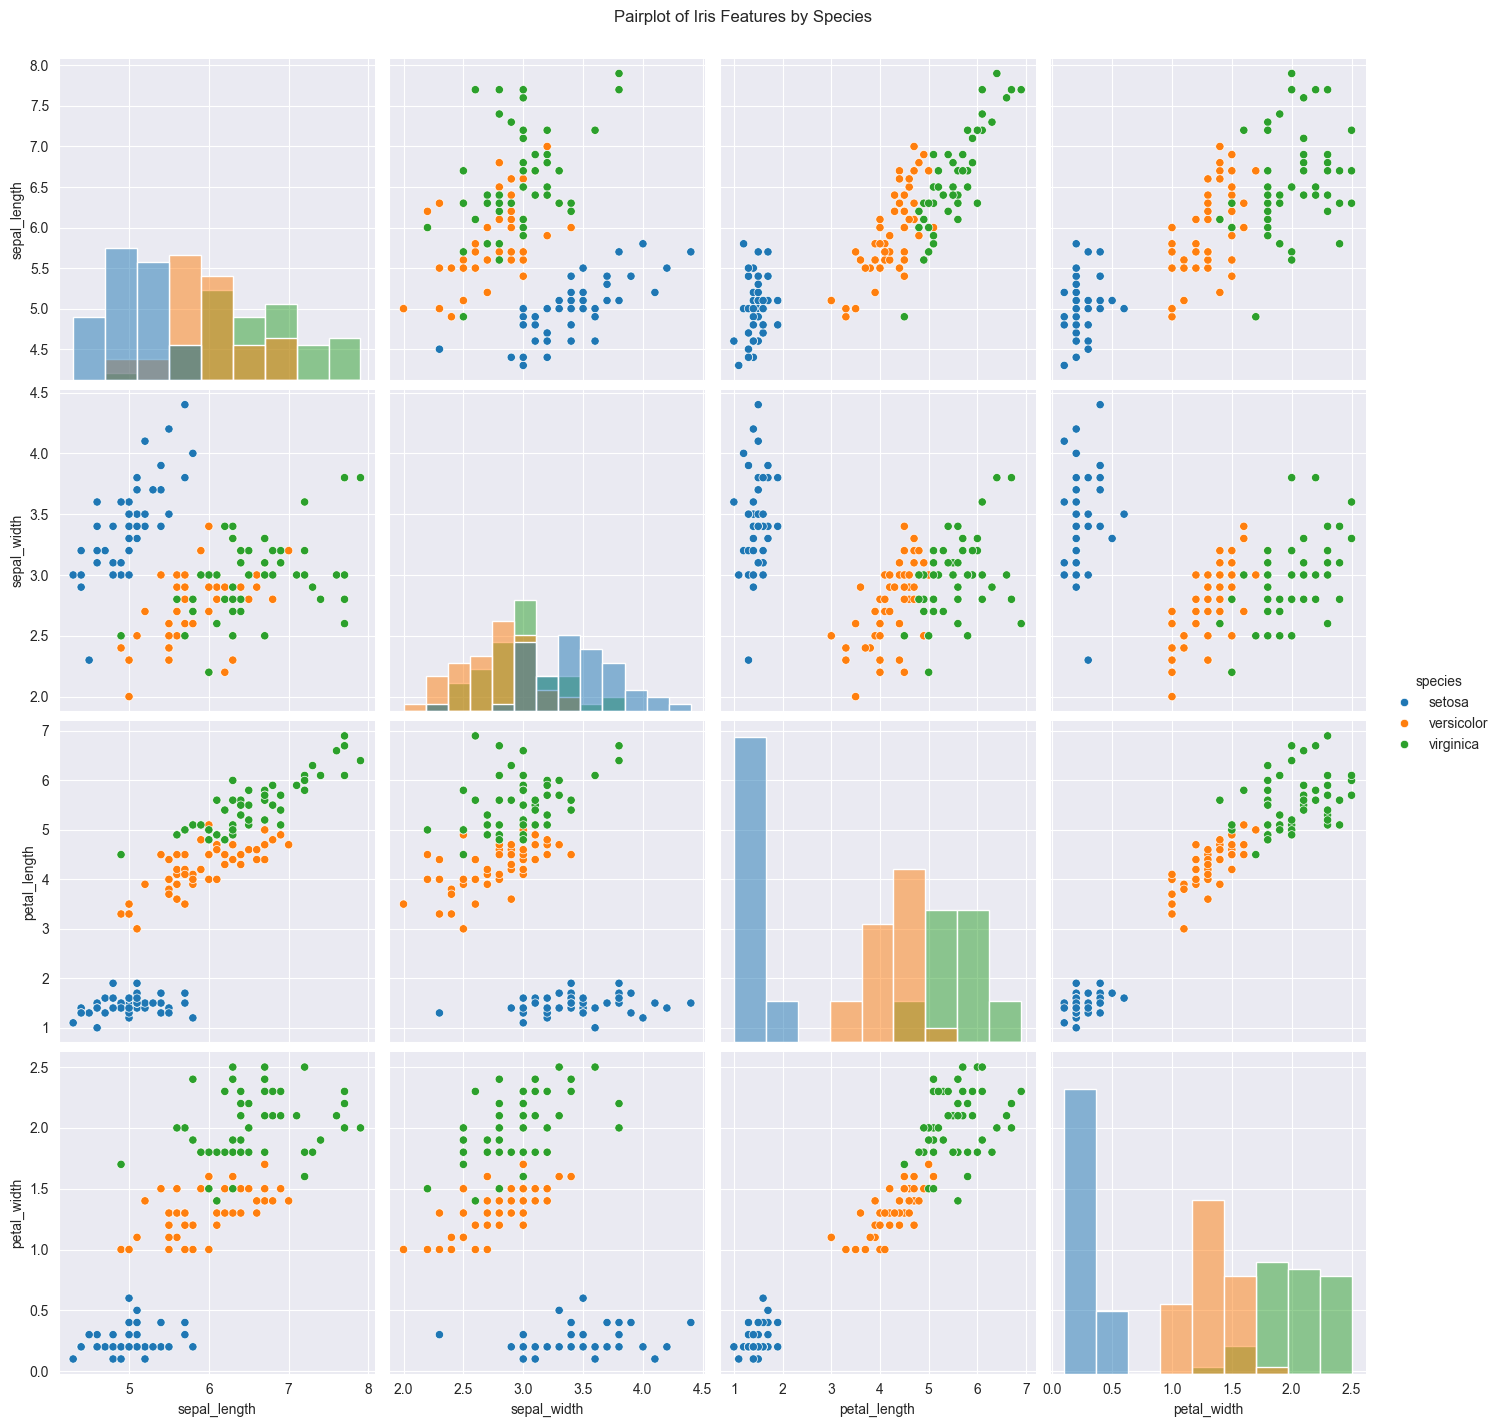

In [64]:
# Creating a pairplot for all possible feature pairs in the Iris dataset
sns.pairplot(iris, hue="species", height=3.5, kind='scatter', diag_kind='hist')

# Adding a title to the pairplot grid
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

What information can you gather about the feature relationships from this plot?

<font color='pink'> MY ANSWER: </font>

***Separation of Species:***

- Setosa: Clearly separated in most feature combinations due to its smaller petal and sepal sizes.
- Versicolor and Virginica: Show overlap in certain feature pairs, particularly sepal dimensions, but are distinguishable in petal dimensions.

***Feature Correlations:***
- Strong positive correlation between petal length and petal width.
- Sepal features (length and width) are less correlated, especially within individual species.

***Distinct Patterns:***

- The diagonal of the grid contains histogram plots, showing the distribution of individual features for each species.
- Petal features tend to be more distinct between species than sepal features.


What plots are on the diagonal of this grid?

<font color='pink'> MY ANSWER: </font>

**The diagonal contains univariate histogram plots, representing the distribution of a single feature for each species.**

**These plots allow us to observe:**

- How concentrated or spread out the values are for each feature.
- Any potential overlaps in feature values between species.


Try replacing the diagonal plots with potentially more informative ones (hint: `sns.pairplot` has a special parameter for this in the documentation). Display the resulting plot.

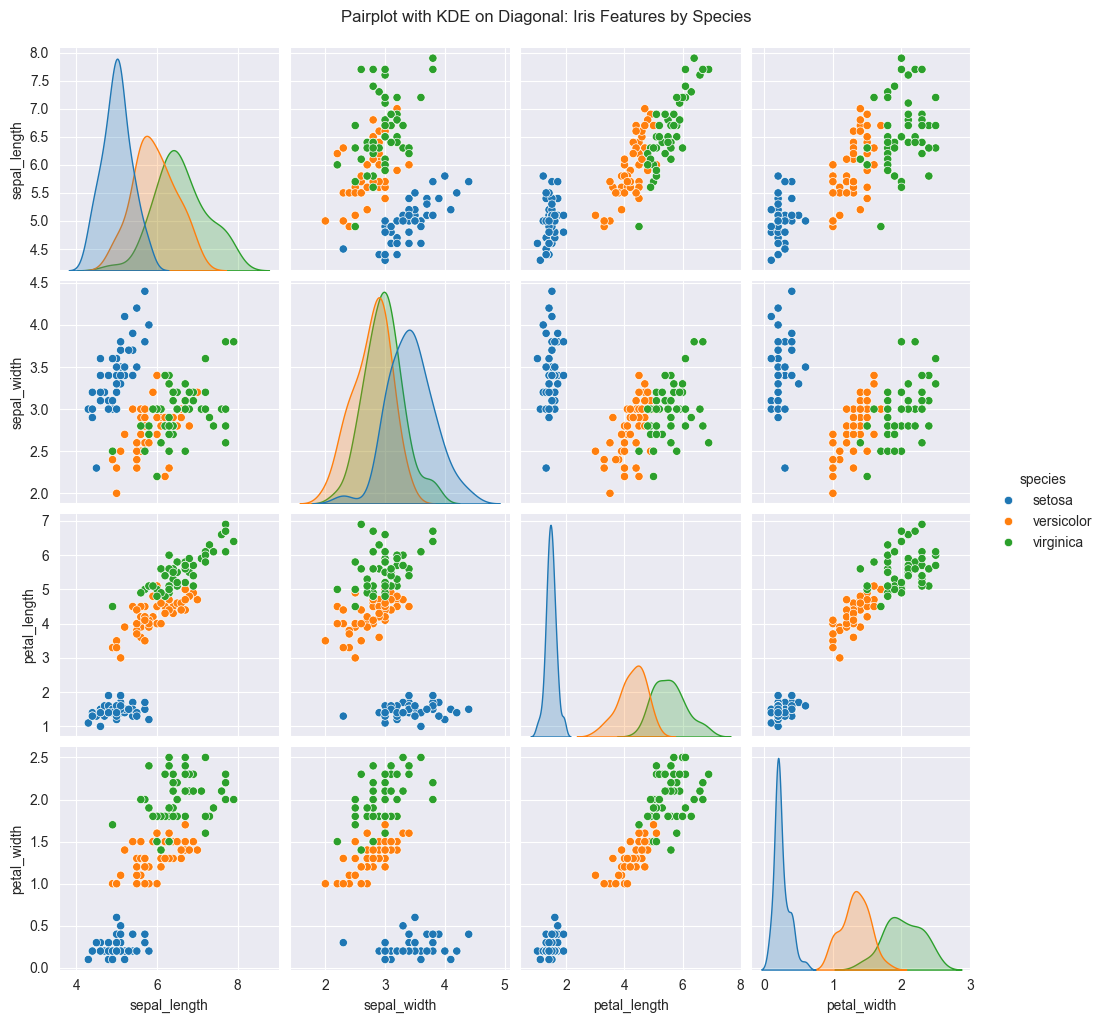

In [67]:

# Creating a pairplot with KDE on the diagonal
pairplot_kde = sns.pairplot(iris, hue="species", height=2.5, diag_kind="kde")

# Adding a title to the pairplot grid
plt.suptitle("Pairplot with KDE on Diagonal: Iris Features by Species", y=1.02)
plt.show()


What plots are now on the diagonal? Does it seem more informative now?

<font color='pink'> MY ANSWER: </font>

***What plots are now on the diagonal?***

- The diagonal now consists of KDE(Kernel Density Estimation) plots, which display smoothed probability density curves for each feature (sepal length, sepal width, petal length, and petal width) categorized by species.

***Does it seem more informative now?***

- Yes, KDE plots are generally more informative in this context. They provide a clear view of the distribution shape for each species' feature. 

About the KDE plots in this dataset:

**Setosa:**

- Distinctly smaller petal features with sharp, non-overlapping distributions.
- Sepal features have minimal overlap with the other species.

**Versicolor and Virginica:**

- Show substantial overlap in petal and sepal features, making them harder to distinguish.
- Petal length and petal width have more separation compared to sepal features, which are more similar.